## EDA

In [1]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import seaborn as sns
from glob import glob

In [2]:
PATH_ROOT = f'../dataset/'

S1 = f'{PATH_ROOT}ROIs1158_spring_s1/'
S2 = f'{PATH_ROOT}ROIs1158_spring_s2/'
S2_CLOUDY = f'{PATH_ROOT}ROIs1158_spring_s2_cloudy/'

PATH_OUTPUT = f'output/'
os.makedirs(PATH_OUTPUT, exist_ok=True)

In [3]:
PATHS_TIF_S1 = sorted(glob(os.path.join(S1, '*', '*.tif')))
PATHS_TIF_S2 = sorted(glob(os.path.join(S2, '*', '*.tif')))
PATHS_TIF_S2_CLOUDY = sorted(glob(os.path.join(S2_CLOUDY, '*', '*.tif')))

assert len(PATHS_TIF_S1) == len(PATHS_TIF_S2) == len(PATHS_TIF_S2_CLOUDY)

df = pd.DataFrame({
    's1': PATHS_TIF_S1,
    's2': PATHS_TIF_S2,
    's2_cloudy': PATHS_TIF_S2_CLOUDY,
})
df.head()

s1  \
0  ../dataset/ROIs1158_spring_s1/s1_1/ROIs1158_sp...   
1  ../dataset/ROIs1158_spring_s1/s1_1/ROIs1158_sp...   
2  ../dataset/ROIs1158_spring_s1/s1_1/ROIs1158_sp...   
3  ../dataset/ROIs1158_spring_s1/s1_1/ROIs1158_sp...   
4  ../dataset/ROIs1158_spring_s1/s1_1/ROIs1158_sp...   

                                                  s2  \
0  ../dataset/ROIs1158_spring_s2/s2_1/ROIs1158_sp...   
1  ../dataset/ROIs1158_spring_s2/s2_1/ROIs1158_sp...   
2  ../dataset/ROIs1158_spring_s2/s2_1/ROIs1158_sp...   
3  ../dataset/ROIs1158_spring_s2/s2_1/ROIs1158_sp...   
4  ../dataset/ROIs1158_spring_s2/s2_1/ROIs1158_sp...   

                                           s2_cloudy  
0  ../dataset/ROIs1158_spring_s2_cloudy/s2_cloudy...  
1  ../dataset/ROIs1158_spring_s2_cloudy/s2_cloudy...  
2  ../dataset/ROIs1158_spring_s2_cloudy/s2_cloudy...  
3  ../dataset/ROIs1158_spring_s2_cloudy/s2_cloudy...  
4  ../dataset/ROIs1158_spring_s2_cloudy/s2_cloudy...

In [4]:
len(PATHS_TIF_S1), len(PATHS_TIF_S2), len(PATHS_TIF_S2_CLOUDY)

(29117, 29117, 29117)

(256, 256, 2)


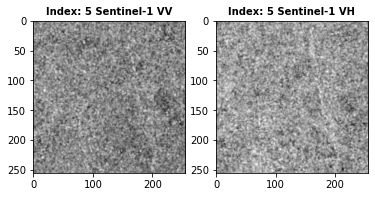

(256, 256, 13)


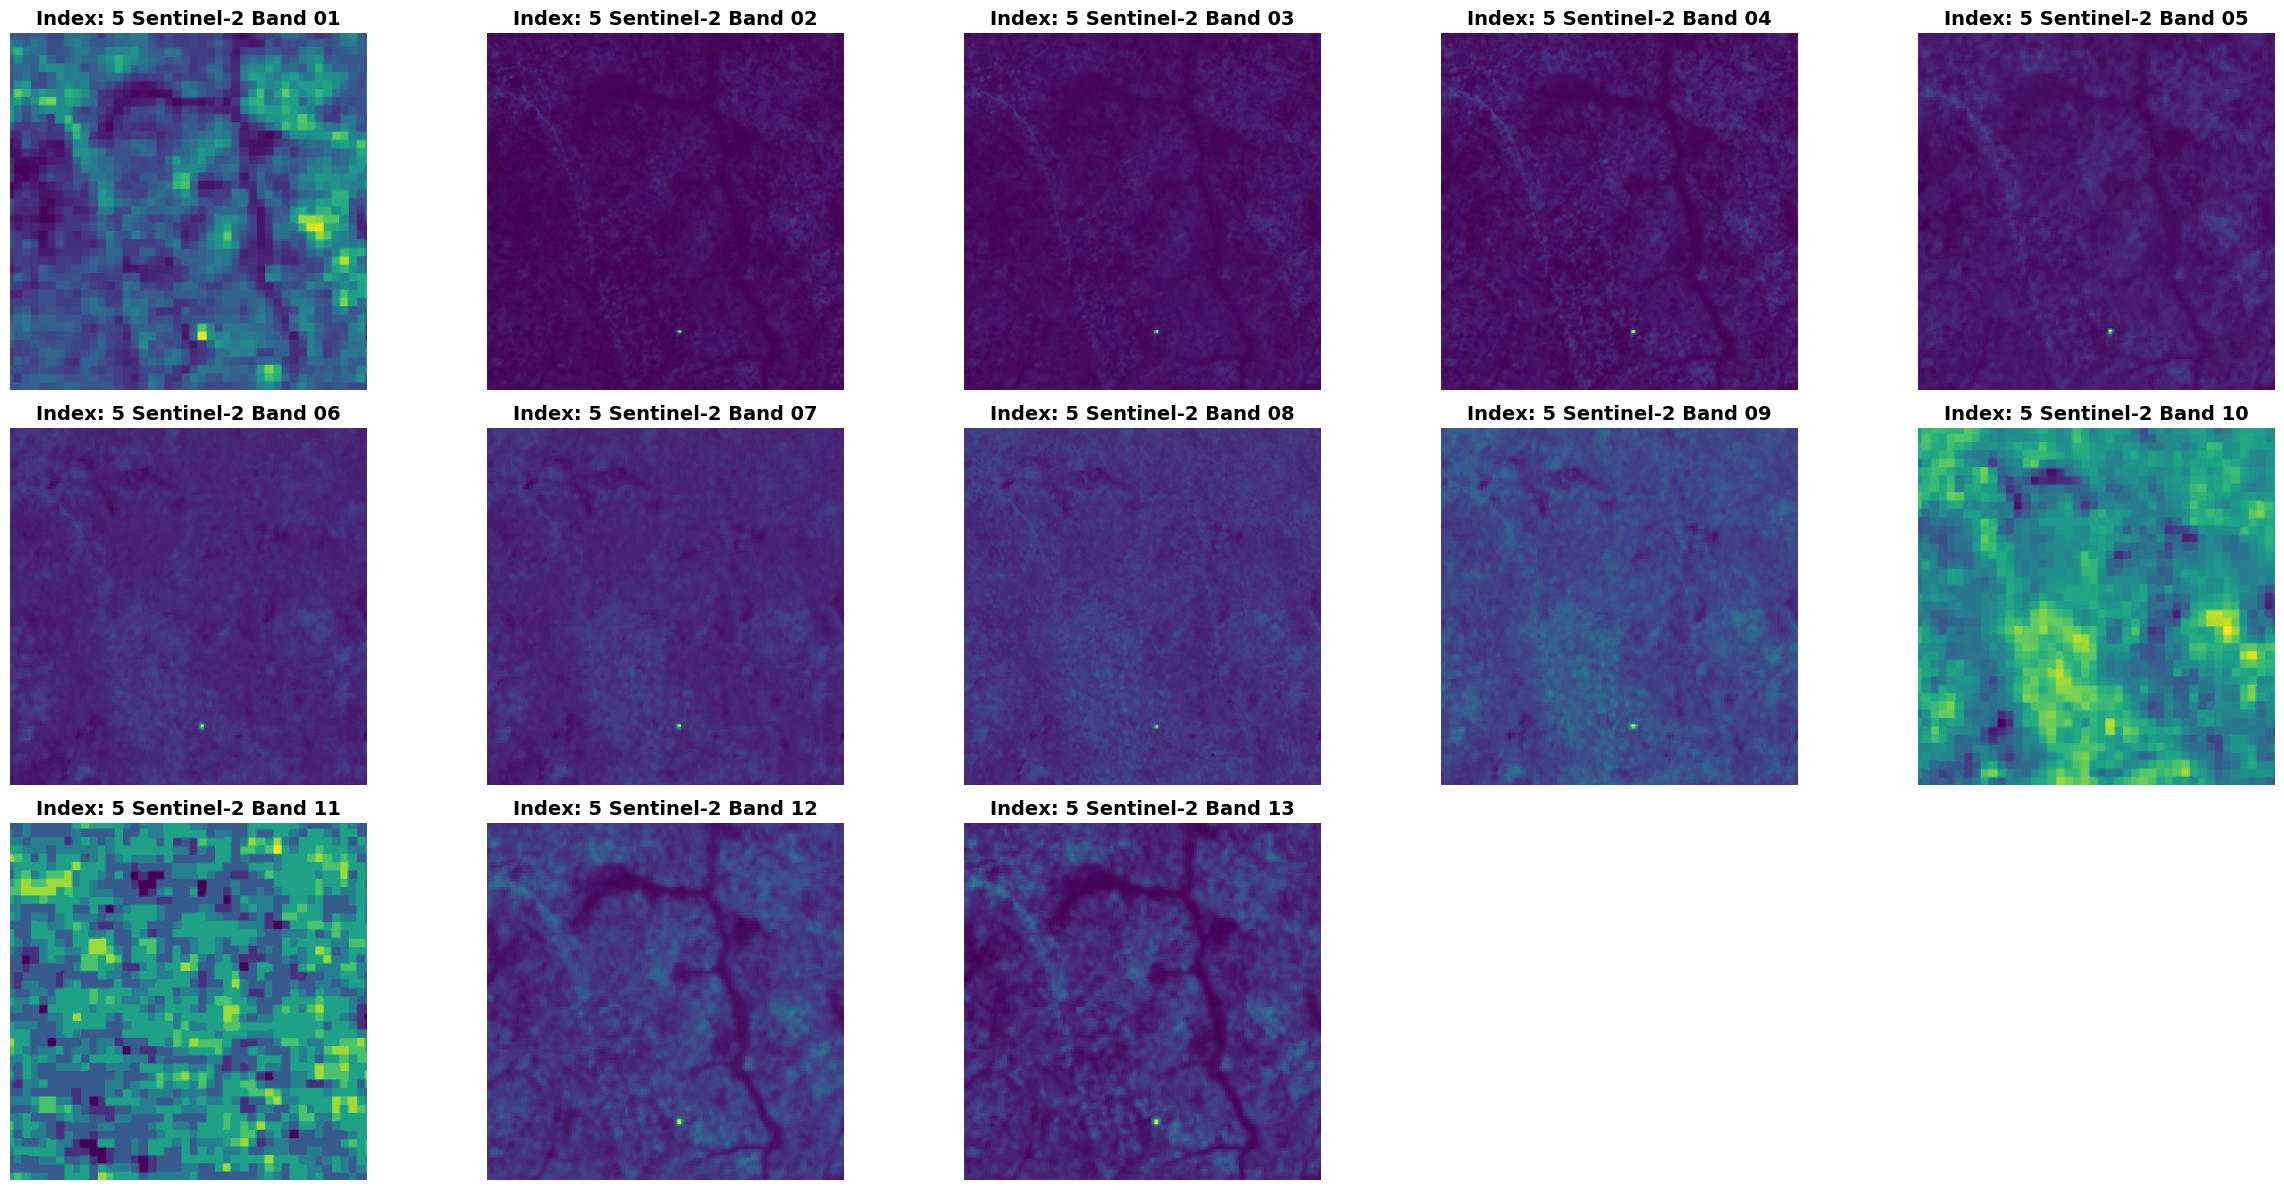

In [5]:
IDX = 5

img_s1 = tifffile.imread(df['s1'].iloc[IDX])
print(img_s1.shape)

plt.figure(figsize=(6, 14))
for i, pol in enumerate(['VV', 'VH']):
    plt.subplot(1, 2, i+1)
    plt.title(f'Index: {IDX} Sentinel-1 {pol}', fontsize=10, fontweight='bold')
    plt.imshow(img_s1[:,:,i], cmap='gray')
plt.savefig(f'{PATH_OUTPUT}s1_{IDX}.png', bbox_inches='tight', dpi=150)
plt.show();
    
img_s2 = tifffile.imread(df['s2'].iloc[IDX])
print(img_s2.shape)

plt.figure(figsize=(24, 12), dpi=100)
for i, band in enumerate([f'Band {str(b).zfill(2)}' for b in range(1, 14)]):

    plt.subplot(3, 5, i+1)

    plt.title(f'Index: {IDX} Sentinel-2 {band}', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.imshow(img_s2[:,:,i])
plt.tight_layout()
plt.savefig(f'{PATH_OUTPUT}s2_{IDX}.png', bbox_inches='tight', dpi=150)
plt.show();

plt.clf()
plt.close()

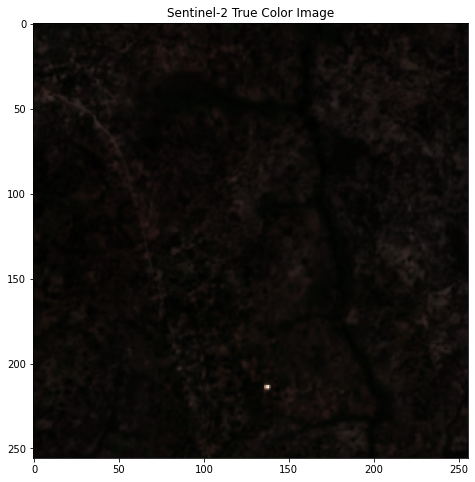

In [6]:
def norm_img(img):
    img = img.astype('float32')
    img = (img - img.min()) / (img.max() - img.min())
    return img

img_true = []

img_true.append(norm_img(img_s2[:,:,3]))
img_true.append(norm_img(img_s2[:,:,2]))
img_true.append(norm_img(img_s2[:,:,1]))

img_true = np.stack(img_true, axis=2)

plt.figure(figsize=(8, 8))
plt.title('Sentinel-2 True Color Image')
plt.imshow(img_true)
plt.savefig(f'{PATH_OUTPUT}true_color.png')
plt.show();

In [7]:
df.s1.iloc[0]

'../dataset/ROIs1158_spring_s1/s1_1/ROIs1158_spring_s1_1_p100.tif'

In [8]:
# meta info
df['area'] = df.s1.str.split('/').str[-2]
df['file'] = df.s1.str.split('/').str[-1]
df['name'] = df.file.str.split('.').str[0]
df['patch'] = df.name.str.split('_p').str[1]
df['patch'] =  df['patch'].astype(int)
 
df.head()

s1  \
0  ../dataset/ROIs1158_spring_s1/s1_1/ROIs1158_sp...   
1  ../dataset/ROIs1158_spring_s1/s1_1/ROIs1158_sp...   
2  ../dataset/ROIs1158_spring_s1/s1_1/ROIs1158_sp...   
3  ../dataset/ROIs1158_spring_s1/s1_1/ROIs1158_sp...   
4  ../dataset/ROIs1158_spring_s1/s1_1/ROIs1158_sp...   

                                                  s2  \
0  ../dataset/ROIs1158_spring_s2/s2_1/ROIs1158_sp...   
1  ../dataset/ROIs1158_spring_s2/s2_1/ROIs1158_sp...   
2  ../dataset/ROIs1158_spring_s2/s2_1/ROIs1158_sp...   
3  ../dataset/ROIs1158_spring_s2/s2_1/ROIs1158_sp...   
4  ../dataset/ROIs1158_spring_s2/s2_1/ROIs1158_sp...   

                                           s2_cloudy  area  \
0  ../dataset/ROIs1158_spring_s2_cloudy/s2_cloudy...  s1_1   
1  ../dataset/ROIs1158_spring_s2_cloudy/s2_cloudy...  s1_1   
2  ../dataset/ROIs1158_spring_s2_cloudy/s2_cloudy...  s1_1   
3  ../dataset/ROIs1158_spring_s2_cloudy/s2_cloudy...  s1_1   
4  ../dataset/ROIs1158_spring_s2_cloudy/s2_cloudy...  s1_1   

                            file                       name  patch  
0  ROIs1158_spring_s1_1_p100.tif  ROIs1158_spring_s1_1_p100    100  
1  ROIs1158_spring_s1_1_p101.tif  ROIs1158_spring_s1_1_p101    101  
2  ROIs1158_spring_s1_1_p102.tif  ROIs1158_spring_s1_1_p102    102  
3  ROIs1158_spring_s1_1_p103.tif  ROIs1158_spring_s1_1_p103    103  
4  ROIs1158_spring_s1_1_p104.tif  ROIs1158_spring_s1_1_p104    104

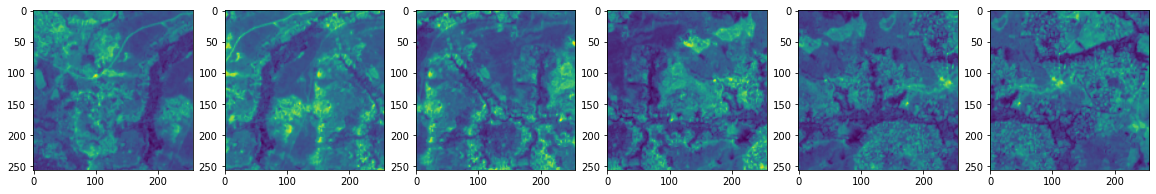

In [9]:
AREA = 6

NUM_SAMPLE = 6

#Area6のデータ(700個ある）の最初の6個
df_area = df[df['area'] == f's1_{AREA}'][:6]

plt.figure(figsize=(20, 10))
for i in range(NUM_SAMPLE):
    PATH = df_area.iloc[i]['s2']
    img = tifffile.imread(PATH)[:,:,4]
    plt.subplot(1, 6, i+1)
    plt.imshow(img)

plt.savefig(f'{PATH_OUTPUT}/same_area_{AREA}.png')
plt.show();

plt.clf()
plt.close()

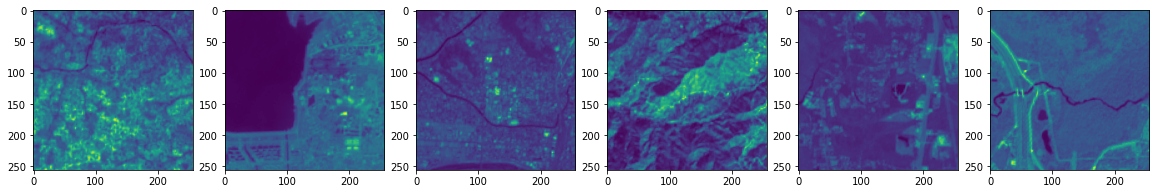

In [10]:
PATCH = 102

NUM_SAMPLE = 6

df_area = df[df['patch'] == PATCH][:6]

plt.figure(figsize=(20, 10))
for i in range(NUM_SAMPLE):
    PATH = df_area.iloc[i]['s2']
    img = tifffile.imread(PATH)[:,:,4]
    plt.subplot(1, 6, i+1)
    plt.imshow(img)

plt.savefig(f'{PATH_OUTPUT}/same_area_{AREA}.png')
plt.show();

plt.clf()
plt.close()

(256, 256, 13)


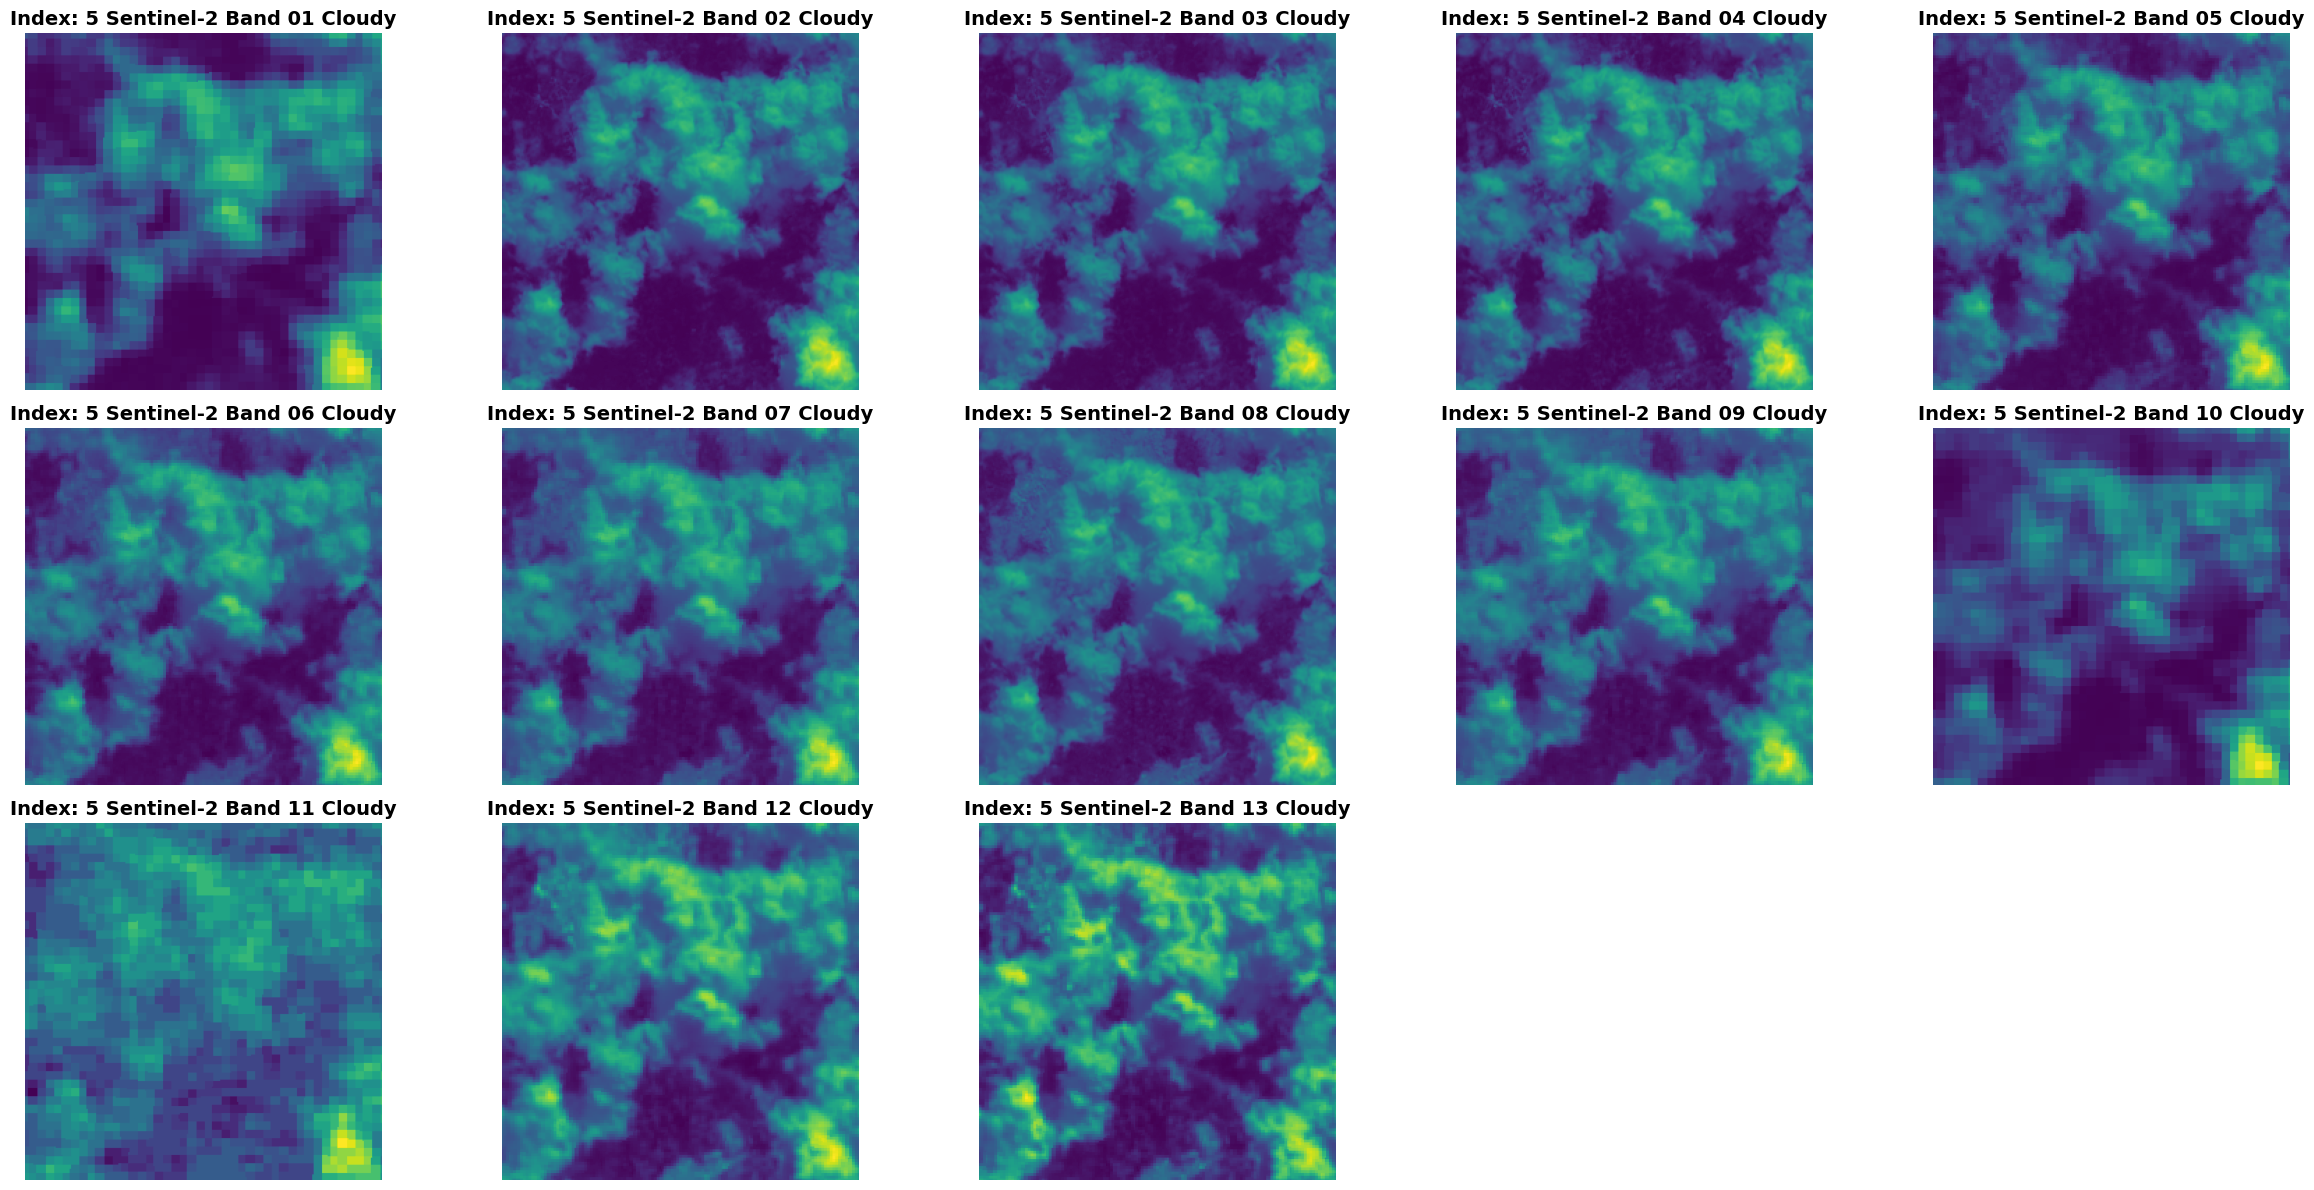

In [11]:
img_c = tifffile.imread(df['s2_cloudy'].iloc[IDX])
print(img_c.shape)

plt.figure(figsize=(24, 12), dpi=100)
for i, band in enumerate([f'Band {str(b).zfill(2)}' for b in range(1, 14)]):

    plt.subplot(3, 5, i+1)

    plt.title(f'Index: {IDX} Sentinel-2 {band} Cloudy', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.imshow(img_c[:,:,i])
plt.tight_layout()
plt.savefig(f'{PATH_OUTPUT}s2_cloudy_{IDX}.png', bbox_inches='tight', dpi=150)
plt.show();

plt.clf()
plt.close()

In [12]:
!pip install geopandas
!pip install contextily

In [13]:
import rasterio
from pyproj import Proj, transform
IDX = 5
fn = df['s2_cloudy'].iloc[IDX]
# TIFFファイルを開く
with rasterio.open(fn) as src:
    # 座標系（CRS）を表示
    print("CRS:", src.crs)
    
    # 変換行列を表示
    print("Transform:", src.transform)

    # ジオリファレンス座標系（例えばUTM座標系）から緯度経度に変換
    # 画像の左上隅の座標（ピクセル位置 (0, 0)）を取得
    x, y = src.transform * (0, 0)

    # 座標系がUTM（例: EPSG:32737）なら、pyprojで変換
    # 例として、EPSG:32737 (UTMゾーン37S) からWGS84 (緯度経度) に変換
    if src.crs.to_epsg() == 32737:
        # UTM座標系（EPSG:32737）のプロジェクション
        utm_proj = Proj(proj='utm', zone=37, south=True, datum='WGS84')

        # WGS84の緯度経度座標系
        wgs84_proj = Proj(proj='latlong', datum='WGS84')

        # UTM座標から緯度経度に変換
        lon, lat = transform(utm_proj, wgs84_proj, x, y)

        print(f"Latitude: {lat}, Longitude: {lon}")

CRS: EPSG:32737
Transform: | 10.00, 0.00, 397172.34|
| 0.00,-10.00, 8114182.84|
| 0.00, 0.00, 1.00|
Latitude: -17.054307806841596, Longitude: 38.03372661236803


/tmp/ipykernel_14911/3262918387.py:27: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(utm_proj, wgs84_proj, x, y)


In [14]:
def get_xy(path):
    with rasterio.open(path, 'r') as src:
        trafo = src.transform
        crs = src.crs
    x = trafo[2]
    y = trafo[5]
    
    inProj = Proj(init=crs)
    outProj = Proj(init='epsg:4326')
    x,y = transform(inProj,outProj,x,y)

    return x,y

x, y = get_xy(fn)
x, y

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_14911/1890038178.py:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x,y = transform(inProj,outProj,x,y)


(38.03372661236803, -17.054307806841596)

In [15]:
import glob
import pandas as pd
import os
import rasterio
from pyproj import Proj, transform
import warnings
# すべてのワーニングを無効化
warnings.filterwarnings("ignore")

def get_xy(path):
    with rasterio.open(path, 'r') as src:
        trafo = src.transform
        crs = src.crs
    x = trafo[2]
    y = trafo[5]
    
    inProj = Proj(init=crs)
    outProj = Proj(init='epsg:4326')
    x,y = transform(inProj,outProj,x,y)

    return x,y

root = '../dataset/ROIs1158_spring_s2'
tiles = pd.DataFrame(glob.glob(os.path.join(root,'*','*.tif')), columns=["path"])
split = tiles["path"].apply(lambda path: os.path.basename(path).split('_'))
#split = pd.DataFrame.from_records(split, columns=["seed","season","sensor","wether", "region","tile"])
split = pd.DataFrame.from_records(split, columns=["seed","season","sensor", "region","tile"])
tiles = tiles.join(split)
regions = tiles.groupby("region").first()
xy = pd.DataFrame.from_records(regions["path"].apply(get_xy), columns=["x","y"])
regions = regions.reset_index().join(xy)

In [16]:
regions.head()
regions.shape
type(regions['region'].values)
regions[regions['region'].isin(['101', '132', '141'])]

region                                               path      seed  \
2     101  ../dataset/ROIs1158_spring_s2/s2_101/ROIs1158_...  ROIs1158   
16    132  ../dataset/ROIs1158_spring_s2/s2_132/ROIs1158_...  ROIs1158   
19    141  ../dataset/ROIs1158_spring_s2/s2_141/ROIs1158_...  ROIs1158   

    season sensor      tile           x          y  
2   spring     s2  p346.tif  130.824080  32.700833  
16  spring     s2  p233.tif  139.315804  36.388040  
19  spring     s2  p685.tif  138.561350  35.555818

(-20026376.39, 20026376.39, -10000000.0, 15000000.0)

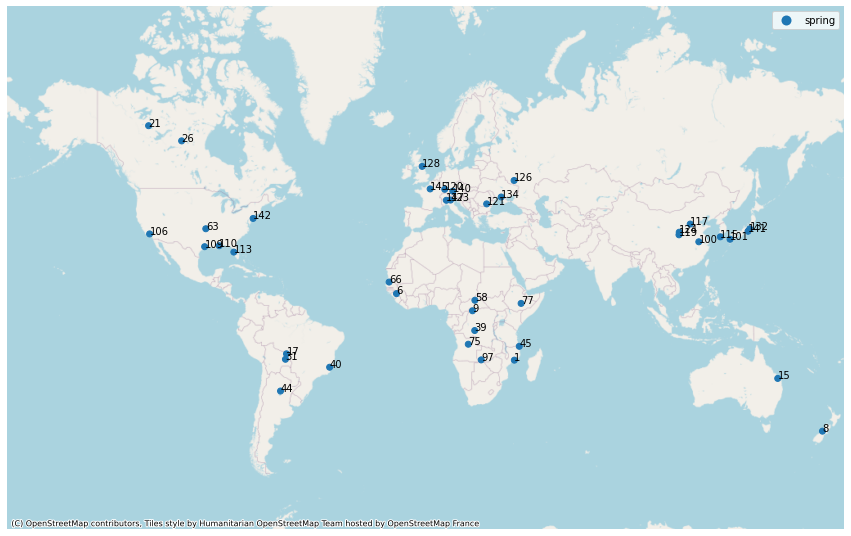

In [18]:
import contextily as ctx
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# xyの順番は経度、緯度
# gdf = geopandas.GeoDataFrame(
#     df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")
# ここに掲載されているプログラムは間違っている
# https://github.com/schmitt-muc/SEN12MS/blob/master/utils/Sen12MSOverview.ipynb

gdf = gpd.GeoDataFrame(regions, geometry=gpd.points_from_xy(regions.x, regions.y),crs=4326).to_crs(epsg=3857)

fig,ax=plt.subplots(figsize=(15,16))

gdf.plot(ax=ax,column="season",legend=True)
#ax.scatter(gdf.geometry.x,gdf.geometry.y, c=gdf.season)
#ctx.add_basemap(ax, url=ctx.providers.CartoDB.TerrainBackground,zoom=3)
#ctx.add_basemap(ax, url=ctx.providers.AzureMaps.MicrosoftTerraMain,zoom=5)
ctx.add_basemap(ax)
#ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
for x,y,region in zip(gdf.geometry.x,gdf.geometry.y,gdf.region):
    ax.annotate(region,(x,y))

ax.set_xlim(-20026376.39,20026376.39)
ax.set_ylim(-1e7, 1.5e7)
ax.axis('off')

In [ ]:
#ctx.providers

### region 101 〒861-3208 熊本県上益城郡御船町滝尾５４５０
### region 132 〒376-0013 群馬県桐生市広沢町３丁目４１９１−１
### region 141 〒400-1513 山梨県中央市大鳥居

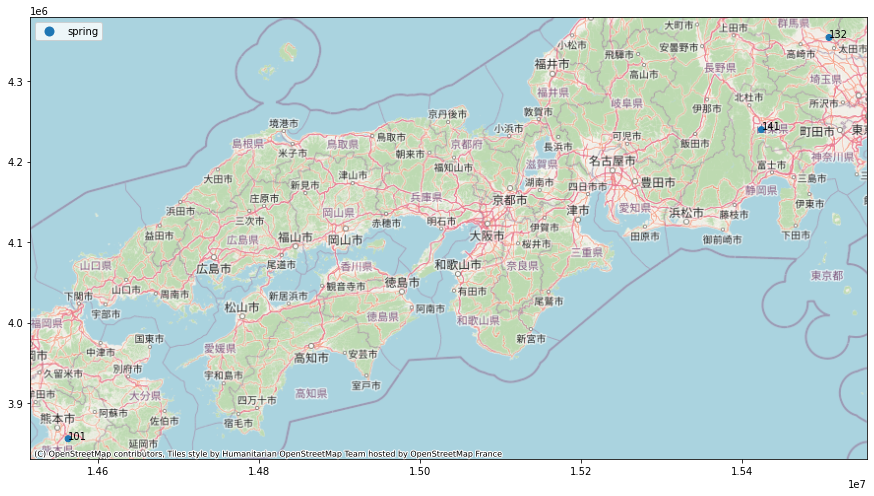

In [19]:
import contextily as ctx
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# xyの順番は経度、緯度
# gdf = geopandas.GeoDataFrame(
#     df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")
# ここに掲載されているプログラムは間違っている
# https://github.com/schmitt-muc/SEN12MS/blob/master/utils/Sen12MSOverview.ipynb

target_regions = regions[regions['region'].isin(['101', '132', '141'])]
gdf = gpd.GeoDataFrame(target_regions, geometry=gpd.points_from_xy(target_regions.x, target_regions.y),crs=4326).to_crs(epsg=3857)

fig,ax=plt.subplots(figsize=(15,16))

gdf.plot(ax=ax,column="season",legend=True)
ctx.add_basemap(ax, url=ctx.providers.AzureMaps.MicrosoftTerraMain)
for x,y,region in zip(gdf.geometry.x,gdf.geometry.y,gdf.region):
    ax.annotate(region,(x,y))

In [95]:
root = '../dataset/ROIs1158_spring_s2'
tiles = pd.DataFrame(glob.glob(os.path.join(root,'*','*.tif')), columns=["path"])
tiles
split = tiles["path"].apply(lambda path: os.path.basename(path).split('_'))
split

0        [ROIs1158, spring, s2, 45, p753.tif]
1        [ROIs1158, spring, s2, 45, p173.tif]
2         [ROIs1158, spring, s2, 45, p98.tif]
3        [ROIs1158, spring, s2, 45, p463.tif]
4        [ROIs1158, spring, s2, 45, p365.tif]
                         ...                 
29112     [ROIs1158, spring, s2, 31, p31.tif]
29113    [ROIs1158, spring, s2, 31, p331.tif]
29114    [ROIs1158, spring, s2, 31, p700.tif]
29115    [ROIs1158, spring, s2, 31, p711.tif]
29116    [ROIs1158, spring, s2, 31, p391.tif]
Name: path, Length: 29117, dtype: object

In [96]:
split = tiles["path"].apply(lambda path: os.path.basename(path).split('_'))
#split = pd.DataFrame.from_records(split, columns=["seed","season","sensor","wether", "region","tile"])
split = pd.DataFrame.from_records(split, columns=["seed","season","sensor", "region","tile"])
split

seed  season sensor region      tile
0      ROIs1158  spring     s2     45  p753.tif
1      ROIs1158  spring     s2     45  p173.tif
2      ROIs1158  spring     s2     45   p98.tif
3      ROIs1158  spring     s2     45  p463.tif
4      ROIs1158  spring     s2     45  p365.tif
...         ...     ...    ...    ...       ...
29112  ROIs1158  spring     s2     31   p31.tif
29113  ROIs1158  spring     s2     31  p331.tif
29114  ROIs1158  spring     s2     31  p700.tif
29115  ROIs1158  spring     s2     31  p711.tif
29116  ROIs1158  spring     s2     31  p391.tif

[29117 rows x 5 columns]

In [97]:
tiles = tiles.join(split)
tiles

path      seed  season  \
0      ../dataset/ROIs1158_spring_s2/s2_45/ROIs1158_s...  ROIs1158  spring   
1      ../dataset/ROIs1158_spring_s2/s2_45/ROIs1158_s...  ROIs1158  spring   
2      ../dataset/ROIs1158_spring_s2/s2_45/ROIs1158_s...  ROIs1158  spring   
3      ../dataset/ROIs1158_spring_s2/s2_45/ROIs1158_s...  ROIs1158  spring   
4      ../dataset/ROIs1158_spring_s2/s2_45/ROIs1158_s...  ROIs1158  spring   
...                                                  ...       ...     ...   
29112  ../dataset/ROIs1158_spring_s2/s2_31/ROIs1158_s...  ROIs1158  spring   
29113  ../dataset/ROIs1158_spring_s2/s2_31/ROIs1158_s...  ROIs1158  spring   
29114  ../dataset/ROIs1158_spring_s2/s2_31/ROIs1158_s...  ROIs1158  spring   
29115  ../dataset/ROIs1158_spring_s2/s2_31/ROIs1158_s...  ROIs1158  spring   
29116  ../dataset/ROIs1158_spring_s2/s2_31/ROIs1158_s...  ROIs1158  spring   

      sensor region      tile  
0         s2     45  p753.tif  
1         s2     45  p173.tif  
2         s2     45   p98.tif  
3         s2     45  p463.tif  
4         s2     45  p365.tif  
...      ...    ...       ...  
29112     s2     31   p31.tif  
29113     s2     31  p331.tif  
29114     s2     31  p700.tif  
29115     s2     31  p711.tif  
29116     s2     31  p391.tif  

[29117 rows x 6 columns]

In [30]:
root = '../dataset/ROIs1158_spring_s2'
tiles = pd.DataFrame(glob.glob(os.path.join(root,'*','*.tif')), columns=["path"])
split = tiles["path"].apply(lambda path: os.path.basename(path).split('_'))
#split = pd.DataFrame.from_records(split, columns=["seed","season","sensor","wether", "region","tile"])
split = pd.DataFrame.from_records(split, columns=["seed","season","sensor", "region","tile"])
tiles = tiles.join(split)

# xy = pd.DataFrame.from_records(tiles["path"].apply(get_xy), columns=["x","y"])
# tiles = tiles.reset_index().join(xy)

### region 101 〒861-3208 熊本県上益城郡御船町滝尾５４５０
### region 132 〒376-0013 群馬県桐生市広沢町３丁目４１９１−１
### region 141 〒400-1513 山梨県中央市大鳥居
target_tiles = tiles[tiles['region'].isin(['101', '132', '141'])]
target_tiles[0:2]['path'].values

array(['../dataset/ROIs1158_spring_s2/s2_132/ROIs1158_spring_s2_132_p233.tif',
       '../dataset/ROIs1158_spring_s2/s2_132/ROIs1158_spring_s2_132_p743.tif'],
      dtype=object)

In [26]:
target_tiles = tiles[tiles['region'].isin(['101', '132', '141'])]

In [29]:
target_tiles[0:2]['path'].values

array(['../dataset/ROIs1158_spring_s2/s2_132/ROIs1158_spring_s2_132_p233.tif',
       '../dataset/ROIs1158_spring_s2/s2_132/ROIs1158_spring_s2_132_p743.tif'],
      dtype=object)